## Explaining xarray

##### By Daniel Wefer

##### First we import our necessary datasets

In [2]:
import xarray as xr

import numpy as np

import matplotlib.pyplot as plt #basic plotting library

import cartopy.crs as ccrs  #coordinate reference system

import cartopy.feature as cfeature   #cartographic features 

## Making a DataArray

##### The most basic element of an xarray dataset is the DataArray. xarray DataArrays are similar to Numpy Arrays, however the focus is on gridded multi-dimensional data instead of individual datasets. Below we will build multi dimensional Numpy Array then convert it into an xr DataArray

In [5]:
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8 ,9], [10, 11, 12]])

data

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [8]:
da = xr.DataArray(data, dims = ['rows', 'columns'])

da

<xarray.DataArray (rows: 4, columns: 3)> Size: 96B
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])
Dimensions without coordinates: rows, columns

## We have now created a DataArray!

## Now we'll use this Data Array to practice selecting, indexing, and slicing

##### The first method will be through np-like selection.

In [10]:
da_selected = da[:,:2]

da_selected

<xarray.DataArray (rows: 4, columns: 2)> Size: 64B
array([[ 1,  2],
       [ 4,  5],
       [ 7,  8],
       [10, 11]])
Dimensions without coordinates: rows, columns

## While this method works in this simple example, selecting with ".sel()" is more effective for arrays with coordinates. Below I'll construct a data array with coordinates then use .sel() to select specific values

In [19]:
data2 = np.array([[10, 20, 30], [40, 50, 60]])

# you can pass coordinates into xarray as a dictionary 

coords = {'x': ['A', 'B'],   # two values for the two rows
          'y': [1, 2, 3]}    # three values for the three columns

da2 = xr.DataArray(data2, dims = ['x', 'y'], coords = coords)

d_selected = da2.sel(x = 'A', y = 2)

d_selected

<xarray.DataArray ()> Size: 8B
array(20)
Coordinates:
    x        <U1 4B 'A'
    y        int64 8B 2

##### This gives us a DataArray with the value at our given coordinate! This is great for when you are looking for data at a specific date for example. 

## You can also Slice inside a .sel() block

In [22]:
d_sliced = da2.sel(x = 'A', y =slice(1, 2))

d_sliced

<xarray.DataArray (y: 2)> Size: 16B
array([10, 20])
Coordinates:
    x        <U1 4B 'A'
  * y        (y) int64 16B 1 2

##### As we can see here, we've made a new Data Array with our sliced values! Next we will use a DataSet, which is essentially a container of multiple DataArrays

## Opening Data into a DataSet

##### For this example, I'll be using a run of the HRRR, which uses a GRIB file instead of a NetCDF file which is more standard in xarray.

In [2]:
ds = xr.open_dataset("hrrr.t18z.wrfsfcf00.grib2")

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'typeOfLevel': 'atmosphere'}
    filter_by_keys={'typeOfLevel': 'cloudTop'}
    filter_by_keys={'typeOfLevel': 'surface'}
    filter_by_keys={'typeOfLevel': 'heightAboveGround'}
    filter_by_keys={'typeOfLevel': 'isothermal'}
    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}
    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigmaLayer'}
    filter_by_keys={'typeOfLevel': 'meanSea'}
    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}
    filter_by_keys={'typeOfLevel': 'sigma'}
    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}
    filter_by_keys={'typeOfLevel': 'depthBelowLand'}
    filter_by_keys={'typeOfLevel': 'isobaricLayer'}
    filter_by_keys={'typeOfLevel': 'boundaryLayerCloudLayer'}
    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}
    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}
    filter_by_keys={'typeOfLevel': 'highCloudLayer'}
    filter_by_keys={'typeOfLevel': 'cloudCeiling'}
    filter_by_keys={'typeOfLevel': 'cloudBase'}
    filter_by_keys={'typeOfLevel': 'nominalTop'}
    filter_by_keys={'typeOfLevel': 'isothermZero'}
    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}
    filter_by_keys={'typeOfLevel': 'adiabaticCondensation'}
    filter_by_keys={'typeOfLevel': 'equilibrium'}
    filter_by_keys={'typeOfLevel': 'unknown'}

## <font color = red>WOah!!! What's all this then? I thought you knew what you were doing!!</font>

Don't worry, everything's under control, you just need to add some extra arguments if it's a grib file instead of a NetCDF. 

In this case, we'll be subsetting with instant data (no averages), and surface data (not 500mb for example)

In [3]:
ds = xr.open_dataset("hrrr.t18z.wrfsfcf00.grib2", filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'}) 

ds

<xarray.Dataset> Size: 305MB
Dimensions:     (y: 1059, x: 1799)
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (y, x) float64 15MB ...
    longitude   (y, x) float64 15MB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables: (12/36)
    vis         (y, x) float32 8MB ...
    gust        (y, x) float32 8MB ...
    sp          (y, x) float32 8MB ...
    orog        (y, x) float32 8MB ...
    t           (y, x) float32 8MB ...
    cnwat       (y, x) float32 8MB ...
    ...          ...
    cfnsf       (y, x) float32 8MB ...
    vbdsf       (y, x) float32 8MB ...
    vddsf       (y, x) float32 8MB ...
    hpbl        (y, x) float32 8MB ...
    lsm         (y, x) float32 8MB ...
    siconc      (y, x) float32 8MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2025-02-05T19:45 GRIB to CDM+CF via cfgrib-0.9.1...

## Hooray we have our data! ...what now?

##### Now we can make a simple plot! By using dot notation to select a variable, then calling ".plot()", we can pretty easily plot our data!

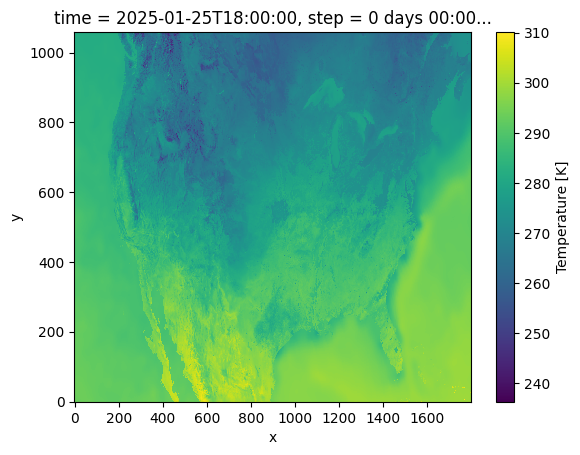

In [4]:
ds.t.plot()  # A plot of surface level temperature

## Nice! Now let's make the plot a little nicer with cartopy and matplotlib

##### I'll be using ".values" to grab our data into variables for ease of use plotting. 

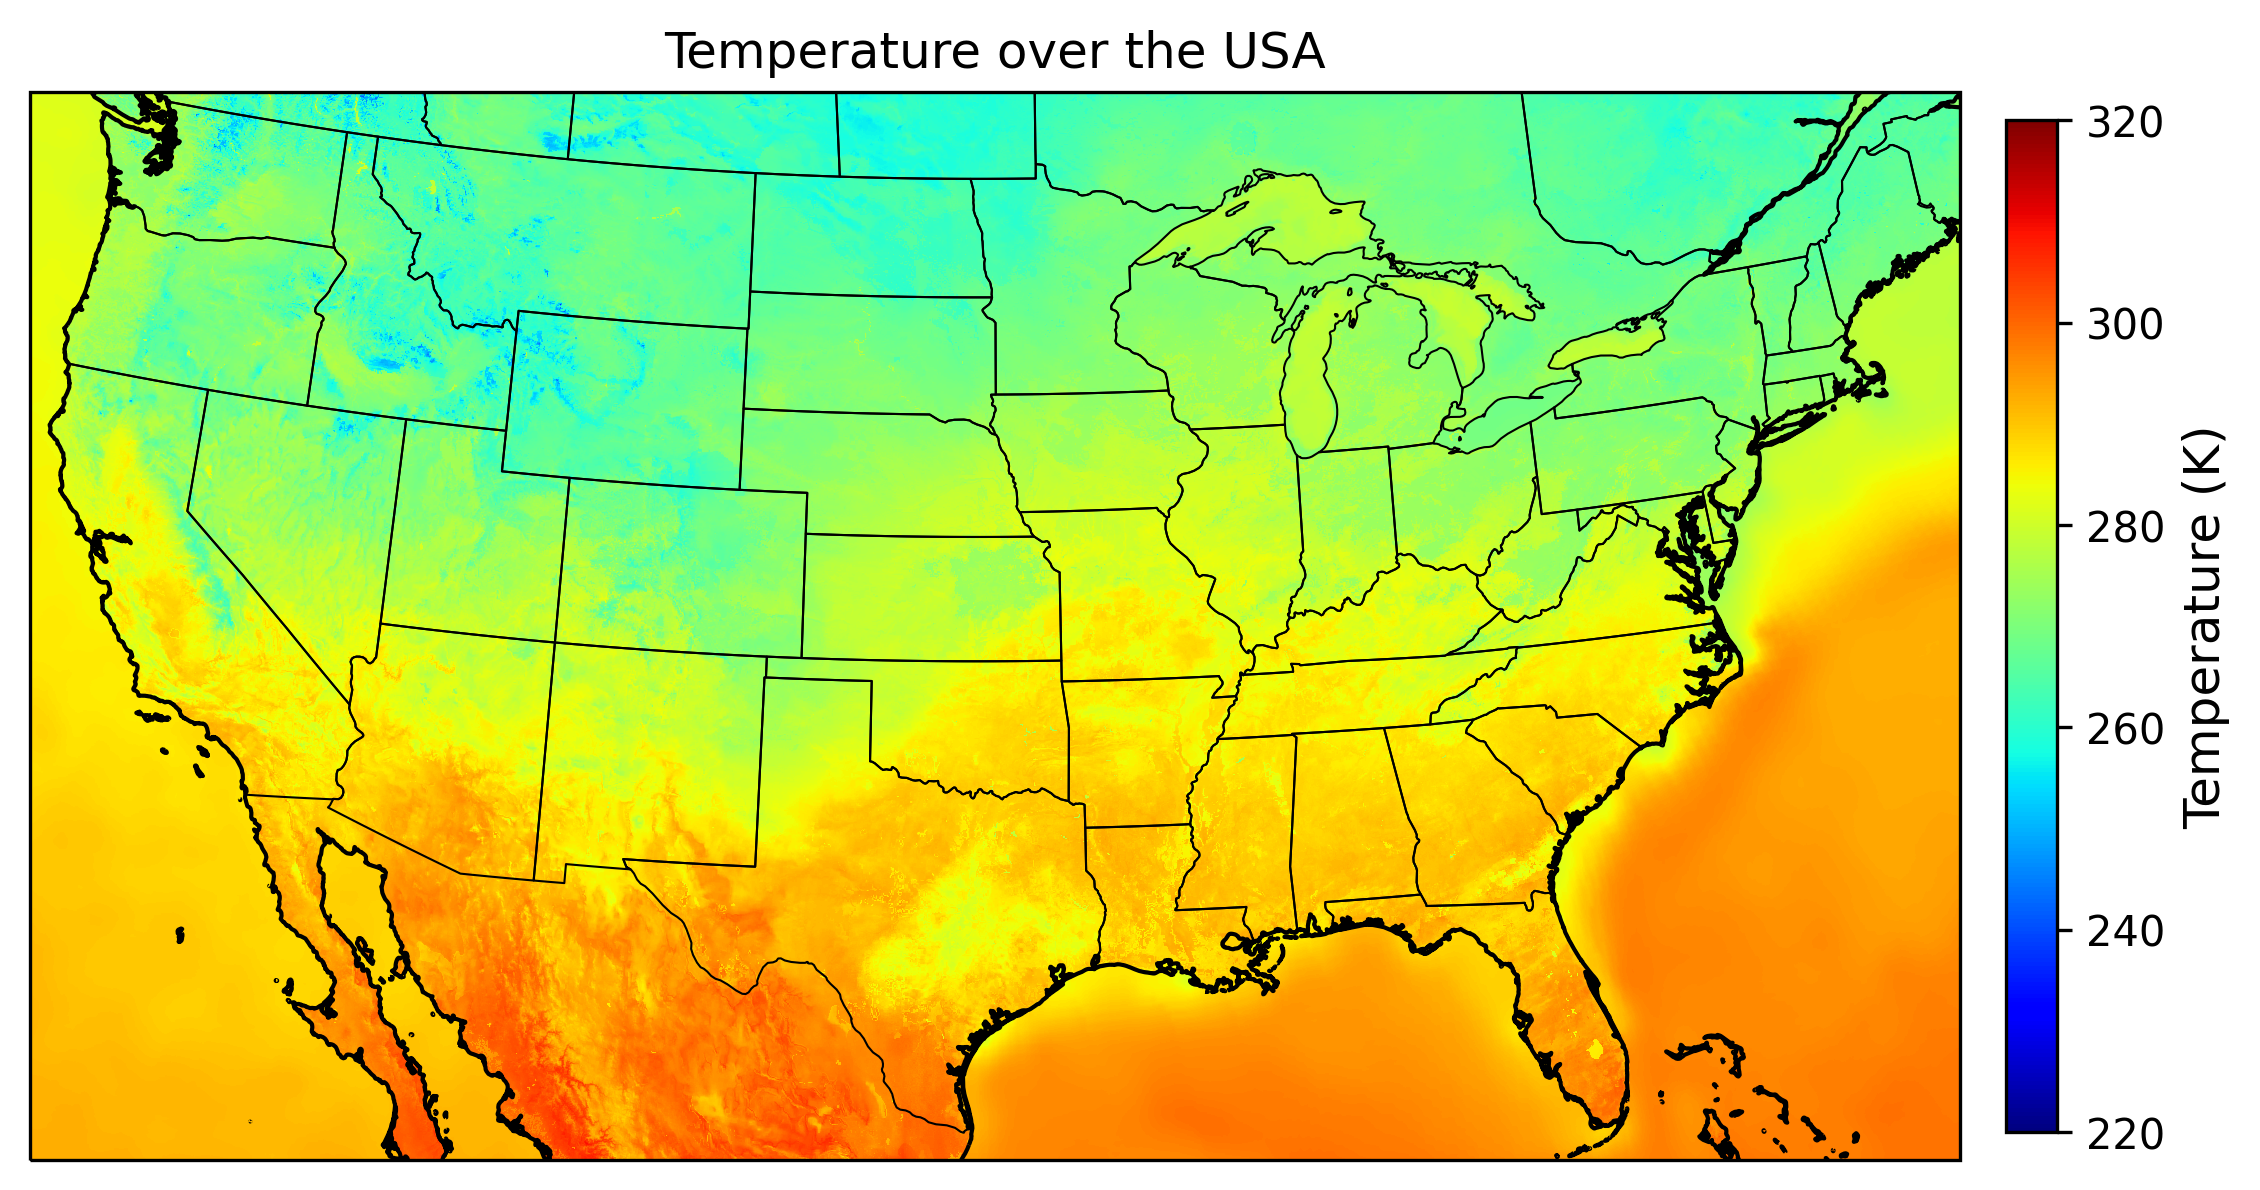

In [5]:
temp = ds.t.values    
lat = ds.latitude.values
lon = ds.longitude.values

fig = plt.figure(figsize=(10, 6),dpi=300)    
ax = fig.add_subplot(1, 1, 1, projection=ccrs.AlbersEqualArea(central_longitude=-97.0, central_latitude=38.5, standard_parallels=(25.0, 25.0)))

p = ax.pcolormesh(lon, lat, temp, vmin=220, vmax=320, transform=ccrs.PlateCarree(), cmap = 'jet')    # Set up our data and colormesh

cbar = plt.colorbar(p, ax=ax, orientation='vertical', shrink=0.73, pad=0.02)    # Set up our colorbar
cbar.set_label("Temperature (K)", fontsize=12)    

ax.coastlines('10m')    # add our coastlines
ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=0.5)    # add state borders
ax.set_extent([-121.5, -71.6, 25, 49.3], crs=ccrs.PlateCarree())    # set our map extent (in this case the CONUS)


plt.title("Temperature over the USA")
plt.show()